In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import random
import pickle as pkl
from math import sqrt
import sys, os
sys.path.insert(0, os.path.abspath(".."))

LOAD DATA

In [12]:
with open("../data/reduced_games.pkl","rb") as f:
    games=pkl.load(f)
with open("../data/tf_idf.pkl","rb") as f2:
    tfidf_pd=pkl.load(f2)
with open("../data/processed_rec.pkl","rb") as f3:
    rec=pkl.load(f3)

In [3]:
rec

app_id  is_recommended  hours   user_id  rating
34347     678950               1   24.3   7243163     4.5
35177    1325200               1    0.5   8689190     3.0
37802     678950               1   24.4  10039294     4.5
44014    1325200               1   15.7   4768934     4.5
46986    1325200               1  162.4  12750792     5.0
...          ...             ...    ...       ...     ...
4108803   239160               1  657.0   2285335     5.0
4108842   235540               0    8.0  11617429     2.0
4109049   333600               1    9.0   4802239     4.0
4109111  1818450               1    1.0  13261742     3.0
4109112   362960               1   35.0   7858713     4.5

[70951 rows x 5 columns]

In [9]:
games

app_id                              title  price_final  \
0       13500  Prince of Persia: Warrior Within™         9.99   
1      113020       Monaco: What's Yours Is Mine        14.99   
2      226560                 Escape Dead Island        14.99   
3      249050            Dungeon of the ENDLESS™        11.99   
4      250180                       METAL SLUG 3         7.99   
...       ...                                ...          ...   
9995  1588380              Blaster Master Zero 3        14.99   
9996  1636000  Tybot Invasion: The Typing Runner         1.99   
9997  1669420                             Islets        19.99   
9998  1693040                  Synthwave Burnout         9.99   
9999  1722390                             Osylla         1.99   

                                            description  \
0     Enter the dark underworld of Prince of Persia ...   
1     Monaco: What's Yours Is Mine is a single playe...   
2     Escape Dead Island is a Survival-Mystery adven...   
3     Dungeon of the Endless is a Rogue-Like Dungeon...   
4     “METAL SLUG 3”, the masterpiece in SNK’s emble...   
...                                                 ...   
9995  The Pinnacle of Mutant Blasting Action Is Here...   
9996  Type words quickly to destroy robots, move amo...   
9997  Take to the sky and reunite a fragmented world...   
9998  The lost highway awaits you to take you beyond...   
9999  Osylla is a horror game based on real events. ...   

                                                   tags  
0     [Action, Adventure, Parkour, Third Person, Gre...  
1     [Co-op, Stealth, Indie, Heist, Local Co-Op, St...  
2     [Zombies, Adventure, Survival, Action, Third P...  
3     [Roguelike, Strategy, Tower Defense, Pixel Gra...  
4     [Arcade, Classic, Action, Co-op, Side Scroller...  
...                                                 ...  
9995  [Action, Adventure, Metroidvania, Exploration,...  
9996  [Typing, Runner, Spelling, On-Rails Shooter, S...  
9997  [Metroidvania, Adventure, Atmospheric, Platfor...  
9998  [Action, Racing, Sports, Rhythm, 3D, Colorful,...  
9999  [Survival Horror, Horror, Stealth, Realistic, ...  

[10000 rows x 5 columns]

In [10]:
tfidf_pd

abandon  abil       abl  aboard  abov  abstract  absurd  abyss  academi  \
0         0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
1         0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
2         0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
3         0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
4         0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
...       ...   ...       ...     ...   ...       ...     ...    ...      ...   
9995      0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
9996      0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
9997      0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
9998      0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
9999      0.0   0.0  0.156991     0.0   0.0       0.0     0.0    0.0      0.0   

        access  ...  youll need  young  young girl  young man  youv  yuri  \
0     0.000000  ...         0.0    0.0         0.0        0.0   0.0   0.0   
1     0.000000  ...         0.0    0.0         0.0        0.0   0.0   0.0   
2     0.000000  ...         0.0    0.0         0.0        0.0   0.0   0.0   
3     0.000000  ...         0.0    0.0         0.0        0.0   0.0   0.0   
4     0.000000  ...         0.0    0.0         0.0        0.0   0.0   0.0   
...        ...  ...         ...    ...         ...        ...   ...   ...   
9995  0.000000  ...         0.0    0.0         0.0        0.0   0.0   0.0   
9996  0.000000  ...         0.0    0.0         0.0        0.0   0.0   0.0   
9997  0.000000  ...         0.0    0.0         0.0        0.0   0.0   0.0   
9998  0.112768  ...         0.0    0.0         0.0        0.0   0.0   0.0   
9999  0.000000  ...         0.0    0.0         0.0        0.0   0.0   0.0   

          zero     zombi  zombi surviv  zone  
0     0.000000  0.000000           0.0   0.0  
1     0.000000  0.000000           0.0   0.0  
2     0.000000  0.276294           0.0   0.0  
3     0.000000  0.000000           0.0   0.0  
4     0.000000  0.000000           0.0   0.0  
...        ...       ...           ...   ...  
9995  0.235272  0.000000           0.0   0.0  
9996  0.000000  0.000000           0.0   0.0  
9997  0.000000  0.000000           0.0   0.0  
9998  0.000000  0.000000           0.0   0.0  
9999  0.000000  0.000000           0.0   0.0  

[10000 rows x 3306 columns]

In [11]:
tfidf_vectors=tfidf_pd.to_numpy()

In [12]:
tfidf_pd=tfidf_pd.join(games["app_id"])
tfidf_pd

abandon  abil       abl  aboard  abov  abstract  absurd  abyss  academi  \
0         0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
1         0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
2         0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
3         0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
4         0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
...       ...   ...       ...     ...   ...       ...     ...    ...      ...   
9995      0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
9996      0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
9997      0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
9998      0.0   0.0  0.000000     0.0   0.0       0.0     0.0    0.0      0.0   
9999      0.0   0.0  0.156991     0.0   0.0       0.0     0.0    0.0      0.0   

        access  ...  young  young girl  young man  youv  yuri      zero  \
0     0.000000  ...    0.0         0.0        0.0   0.0   0.0  0.000000   
1     0.000000  ...    0.0         0.0        0.0   0.0   0.0  0.000000   
2     0.000000  ...    0.0         0.0        0.0   0.0   0.0  0.000000   
3     0.000000  ...    0.0         0.0        0.0   0.0   0.0  0.000000   
4     0.000000  ...    0.0         0.0        0.0   0.0   0.0  0.000000   
...        ...  ...    ...         ...        ...   ...   ...       ...   
9995  0.000000  ...    0.0         0.0        0.0   0.0   0.0  0.235272   
9996  0.000000  ...    0.0         0.0        0.0   0.0   0.0  0.000000   
9997  0.000000  ...    0.0         0.0        0.0   0.0   0.0  0.000000   
9998  0.112768  ...    0.0         0.0        0.0   0.0   0.0  0.000000   
9999  0.000000  ...    0.0         0.0        0.0   0.0   0.0  0.000000   

         zombi  zombi surviv  zone   app_id  
0     0.000000           0.0   0.0    13500  
1     0.000000           0.0   0.0   113020  
2     0.276294           0.0   0.0   226560  
3     0.000000           0.0   0.0   249050  
4     0.000000           0.0   0.0   250180  
...        ...           ...   ...      ...  
9995  0.000000           0.0   0.0  1588380  
9996  0.000000           0.0   0.0  1636000  
9997  0.000000           0.0   0.0  1669420  
9998  0.000000           0.0   0.0  1693040  
9999  0.000000           0.0   0.0  1722390  

[10000 rows x 3307 columns]

Dimensionality Reduction using PCA

In [14]:
pca=PCA(n_components=1300)
pca_matrix=pca.fit_transform(tfidf_vectors)

In [10]:
"""with open("../data/pca_matrix.pkl","wb") as f:
    pkl.dump(pca_matrix,f)"""

Build train set, test set

In [15]:
def rated_game_index_list(user_id):
    rated_game_list=rec[rec["user_id"]==user_id]["app_id"].to_list()
    games_rated_index=games[games["app_id"].isin(rated_game_list)].index.to_numpy()
    return games_rated_index

In [16]:
def build_data(user_id):
    data=rec[rec["user_id"]==user_id]
    data=games.merge(data,on="app_id")
    Y=data["rating"].to_numpy()
    rated_game_list=data["app_id"].to_list()
    games_rated_index=games[games["app_id"].isin(rated_game_list)].index.tolist()
    X=pca_matrix[games_rated_index]
    return (X,Y)

In [ ]:
user_id=10610195
X,Y=build_data(user_id)
print(X.shape)
print(X)
print(Y.shape)
print(Y)

Train and Test

In [17]:
kf=KFold(n_splits=5)

In [18]:
all_users=  rec["user_id"].unique().tolist()
train_rmse={}
test_rmse={}

In [19]:

def train_and_test(model,users):
    k=kf.get_n_splits()
    train_e=0
    test_e=0
    for user_id in users:
        X,Y=build_data(user_id)
        for i,(train_index,test_index) in enumerate(kf.split(X)):
            X_train=X[train_index]
            X_test=X[test_index]
            Y_train=Y[train_index]
            Y_test=Y[test_index]
            model.fit(X_train,Y_train)
            train_pred=model.predict(X_train)
            train_e+=sqrt(mean_squared_error(train_pred,Y_train))/k
            test_pred=model.predict(X_test)
            test_e+=sqrt(mean_squared_error(test_pred,Y_test))/k
    train_e/=len(users)
    test_e/=len(users)
    return train_e,test_e
def visualize_error(hp,model_name,xlabel,title):
    plt.figure(figsize=(15, 6))  # Adjust figure size as desired

    # Plot the train_rmse line (in blue)
    plt.plot(hp, train_rmse[model_name].values(), label='Train RMSE', color='blue',marker="o")

    # Plot the test_rmse line (in red)
    plt.plot(hp, test_rmse[model_name].values(), label='Test RMSE', color='red',marker="o")
    plt.xticks(alpha)
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel('RMSE')
    plt.title(title)

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

Ridge Regression

In [20]:
alpha=[0.1,0.25,0.5,1,2,2.5,5]

In [21]:
train_rmse["ridge"]={}
test_rmse["ridge"]={}
for l in alpha:
    model=Ridge(alpha=l)
    train_rmse["ridge"][l],test_rmse["ridge"][l]=train_and_test(model,all_users)

In [23]:
print(train_rmse["ridge"])
print(test_rmse["ridge"])

{0.1: 0.13077957966814371, 0.25: 0.2604981325524757, 0.5: 0.3953535128415472, 1: 0.541618716279399, 2: 0.6732751193144669, 2.5: 0.709296248140527, 5: 0.7979199543796558}
{0.1: 0.9232006107821373, 0.25: 0.9141845777568872, 0.5: 0.907964208699885, 1: 0.9050568372716843, 2: 0.9064315572146958, 2.5: 0.9075971279672597, 5: 0.9122547344958263}


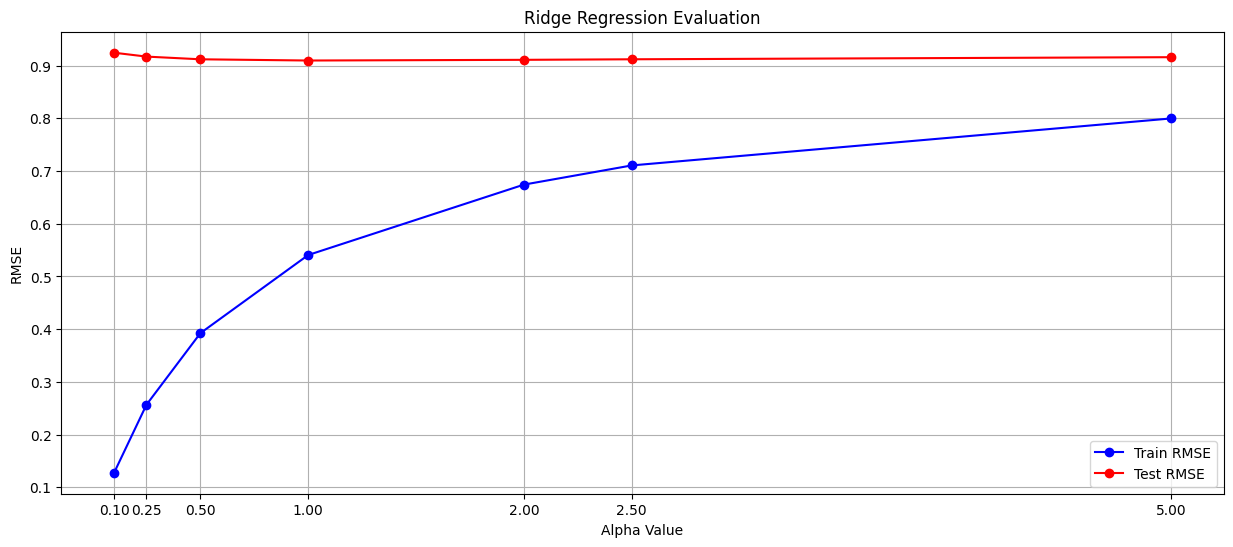

In [27]:
visualize_error(alpha,"ridge","Alpha Value","Ridge Regression Evaluation")

Lasso Regression

In [34]:
alpha=[0,0.01,0.025,0.05,0.1,0.25]

In [35]:
train_rmse["lasso"]={}
test_rmse["lasso"]={}
for l in alpha:
    model=Lasso(alpha=l)
    train_rmse["lasso"][l],test_rmse["lasso"][l]=train_and_test(model,all_users)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP\Ap

In [27]:
print(train_rmse["lasso"])
print(test_rmse["lasso"])

{0: 1.3187720857967449e-06, 0.01: 0.7507722161936565, 0.025: 0.8947240041175011, 0.05: 0.9216870284822886, 0.1: 0.9239479371755192, 0.25: 0.9239490325408694}
{0: 1.2535773173460936, 0.01: 0.9302824931119097, 0.025: 0.9208787292088628, 0.05: 0.9243846155647245, 0.1: 0.925073213558869, 0.25: 0.9250733270007077}


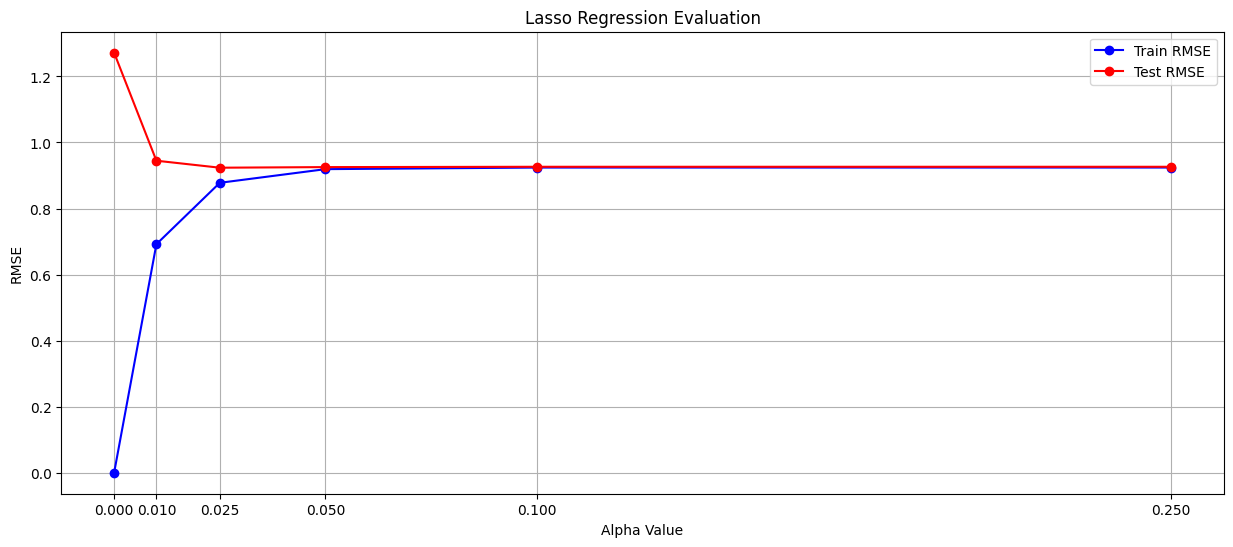

In [36]:
visualize_error(alpha,"lasso","Alpha Value","Lasso Regression Evaluation")

Random Forest Regression

In [28]:
random.seed(10)
n_estimators=[20,50,100,200]
sub_users=random.sample(all_users,100)

In [32]:
train_rmse["random_forest"]={}
test_rmse["random_forest"]={}
for n in n_estimators:
    model=RandomForestRegressor(n_estimators=n,random_state=5,min_samples_leaf=5,max_features=200)
    train_rmse["random_forest"][n],test_rmse["random_forest"][n]=train_and_test(model,sub_users)

In [33]:
print(train_rmse["random_forest"])
print(test_rmse["random_forest"])

{10: 0.36888482817811413}
{10: 0.8656122121372335}


In [ ]:
"""full_rated_list=rated_game_index_list(user_id)
#print("Every rated game index",full_rated_list)
is_rec={i:rec[(rec["app_id"]==games.loc[i]["app_id"]) & (rec["user_id"]==user_id)]["is_recommended"] for i in full_rated_list}
pred_ratings=ridge.predict(pca_matrix)
candidate_list=pred_ratings.argsort()[::-1]
rated_list=full_rated_list[train_index]
#print("rated_list",rated_list)
candidate_list =np.array([i for i in candidate_list if i not in rated_list])
top_100=candidate_list[:100]
#print(pred_ratings[top_100])
good,neutral,bad,score=0,0,0,0
for i in top_100:
    if i in is_rec and is_rec[i].item()==1:
        good+=1
        score+=1
    elif i not in full_rated_list:
        neutral+=1
        score+=0
    else:
        bad+=1
        score-=2
print("Good: %d Bad: %d Neutral %d Total score %d" %(good, bad,neutral, score))"""

GET RECOMMENDATION

In [20]:
user_id=all_users[100]
user_id

13834676

In [21]:
def rec_10_games(user_id):
    X,Y=build_data(user_id)
    lasso=Lasso(alpha=1)
    lasso.fit(X,Y)
    pred_ratings=lasso.predict(pca_matrix)
    candidate_list=pred_ratings.argsort()[::-1]
    rated_list=rated_game_index_list(user_id)
    candidate_list =np.array([i for i in candidate_list if i not in rated_list])
    top_10=candidate_list[:10]
    return games.loc[top_10]["title"]


In [22]:
print(rec_10_games(user_id))

9999                                            Osylla
3329                                  Victor Vran ARPG
3336                               Burnin' Rubber 5 HD
3335                                     Okhlos: Omega
3334                                  A Bastard's Tale
3333                                        METAL SLUG
3332                                         Snakebird
3331    Hyperdimension Neptunia Re;Birth3 V Generation
3330                                              OBEY
3328                                    Disney G-Force
Name: title, dtype: object
